In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style for better visuals
sns.set(style='whitegrid')


In [10]:
# Import pandas (if not already done)
import pandas as pd

# Load the CSV file using a raw string
df = pd.read_csv(r'C:\Users\Sahil Kumar\Desktop\projects for resume\supermarketsales.csv')

# Preview the first five rows
df.head()



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
# Check dataset info (columns, data types, and non-null values)
df.info()

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Get summary statistics of numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [12]:
# Drop duplicate rows, if any
df = df.drop_duplicates()

# Ensure 'Date' is treated as a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Month' column for analysis
df['Month'] = df['Date'].dt.month_name()

# Preview the modified DataFrame
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,February


C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_12972\3769145988.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Total', data=branch_sales, palette='viridis')


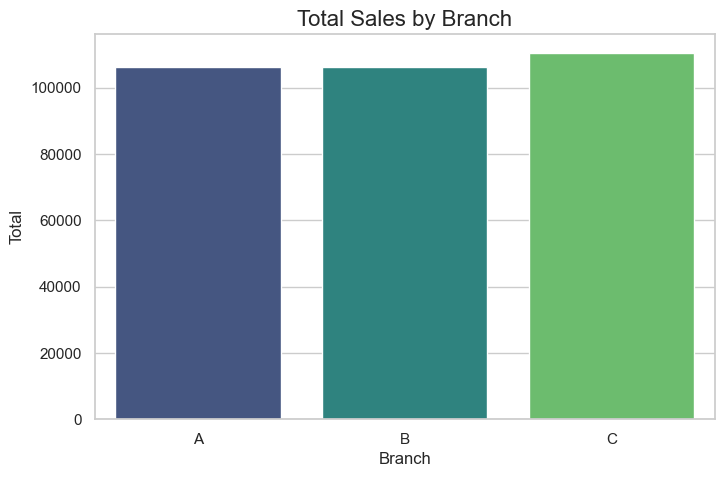

In [13]:
# Group by Branch and calculate total sales
branch_sales = df.groupby('Branch')['Total'].sum().reset_index()

# Plot total sales by branch
plt.figure(figsize=(8, 5))
sns.barplot(x='Branch', y='Total', data=branch_sales, palette='viridis')
plt.title("Total Sales by Branch", fontsize=16)
plt.show()


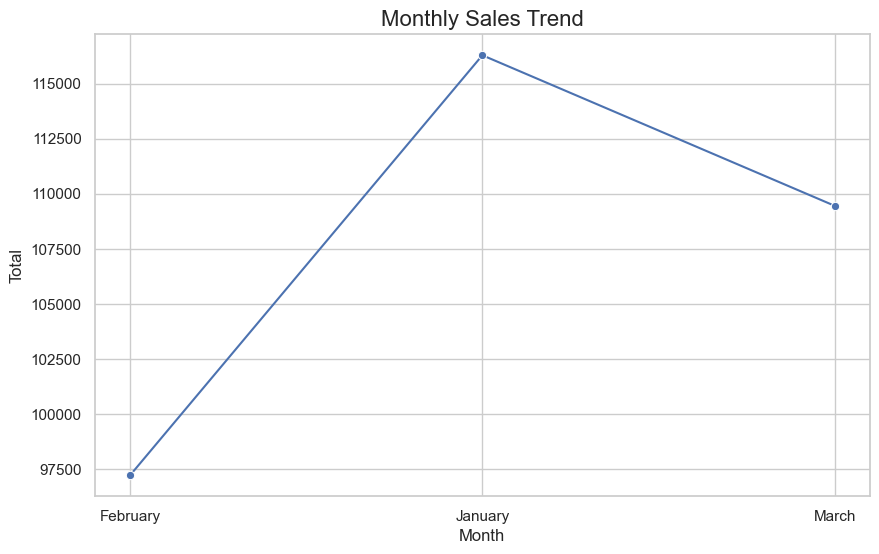

In [14]:
# Group by Month to analyze monthly sales
monthly_sales = df.groupby('Month')['Total'].sum().reset_index()

# Plot sales by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Total', data=monthly_sales, marker='o')
plt.title("Monthly Sales Trend", fontsize=16)
plt.show()


C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_12972\3397929406.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='coolwarm')


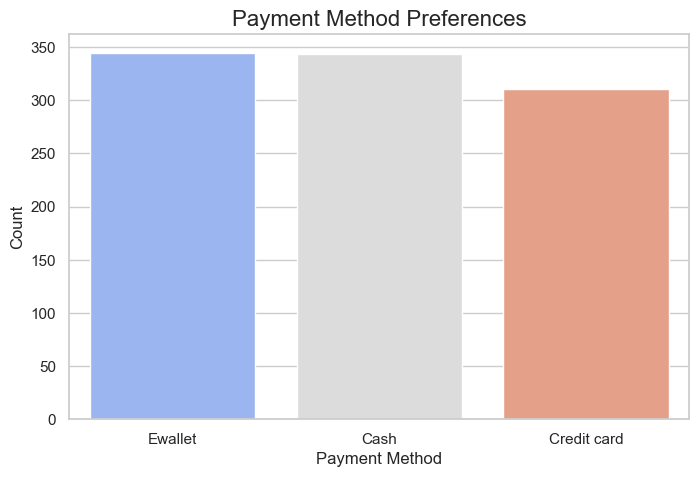

In [15]:
# Count of each payment method
payment_counts = df['Payment'].value_counts()

# Plot payment method preferences
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='coolwarm')
plt.title("Payment Method Preferences", fontsize=16)
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_12972\1632745140.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Total', data=gender_spending, palette='Set2')


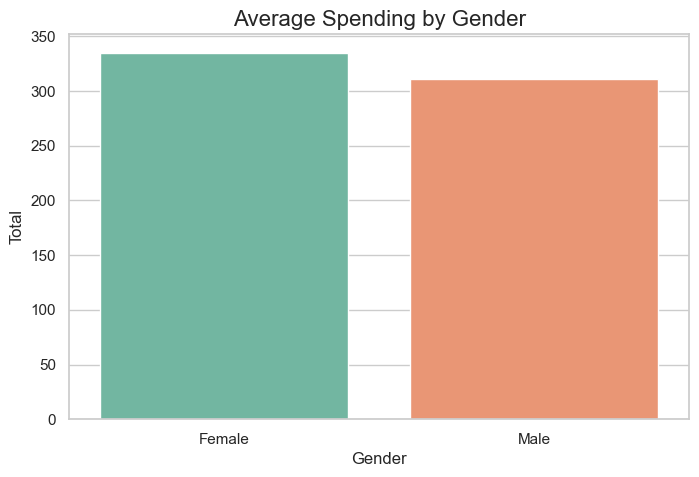

In [16]:
# Average total by Gender
gender_spending = df.groupby('Gender')['Total'].mean().reset_index()

# Plot gender-based average spending
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Total', data=gender_spending, palette='Set2')
plt.title("Average Spending by Gender", fontsize=16)
plt.show()


C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_12972\2706645619.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total', y='Product line', data=product_sales, palette='Blues_r')


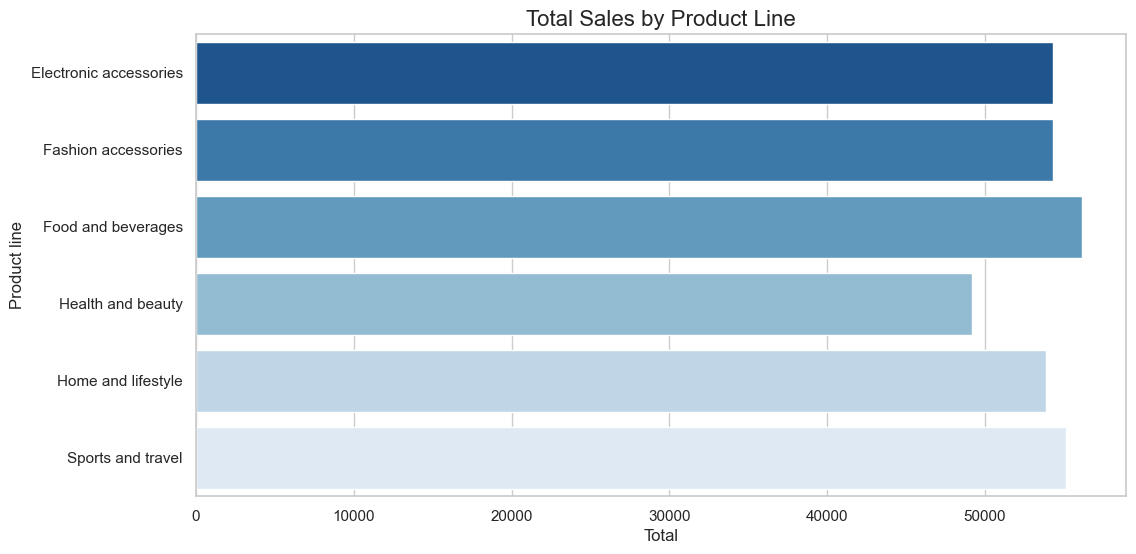

In [17]:
# Group by Product Line and calculate total sales
product_sales = df.groupby('Product line')['Total'].sum().reset_index()

# Plot sales by product line
plt.figure(figsize=(12, 6))
sns.barplot(x='Total', y='Product line', data=product_sales, palette='Blues_r')
plt.title("Total Sales by Product Line", fontsize=16)
plt.show()


C:\Users\Sahil Kumar\AppData\Local\Temp\ipykernel_12972\742349518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Product line', data=df, palette='Spectral')


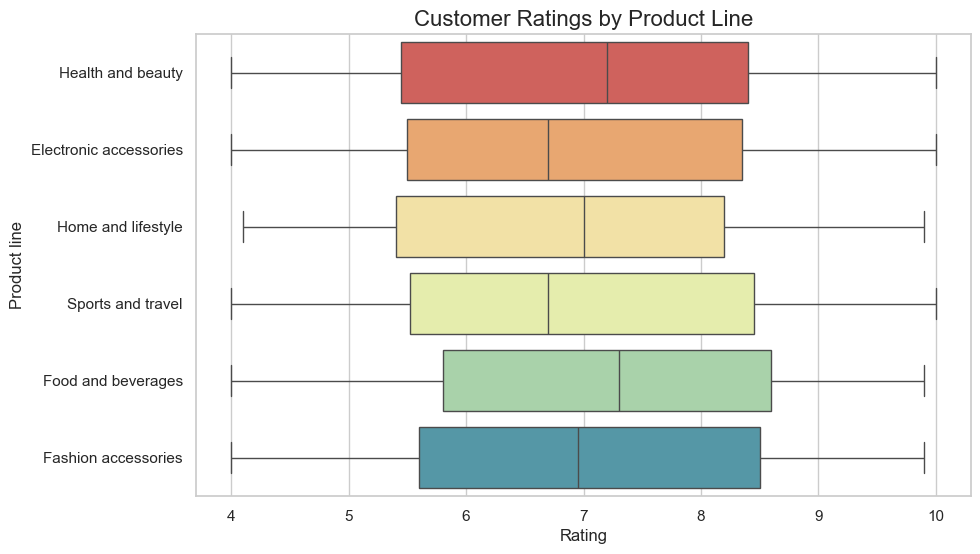

In [18]:
# Plot distribution of customer ratings across product lines
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Product line', data=df, palette='Spectral')
plt.title("Customer Ratings by Product Line", fontsize=16)
plt.show()


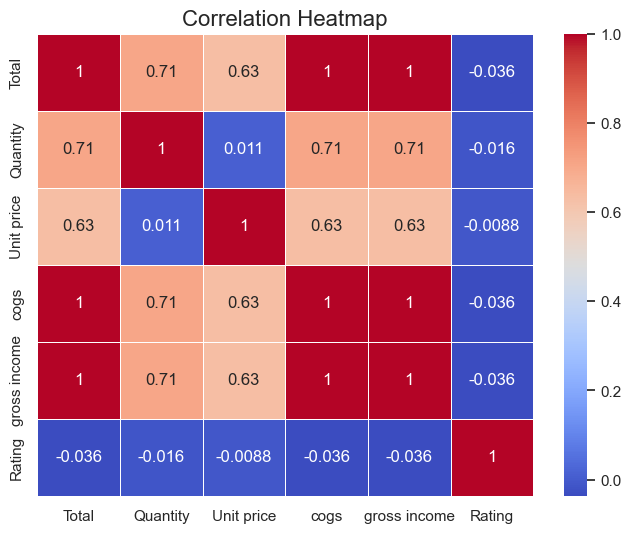

In [19]:
# Compute correlation matrix
corr = df[['Total', 'Quantity', 'Unit price', 'cogs', 'gross income', 'Rating']].corr()

# Plot the heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


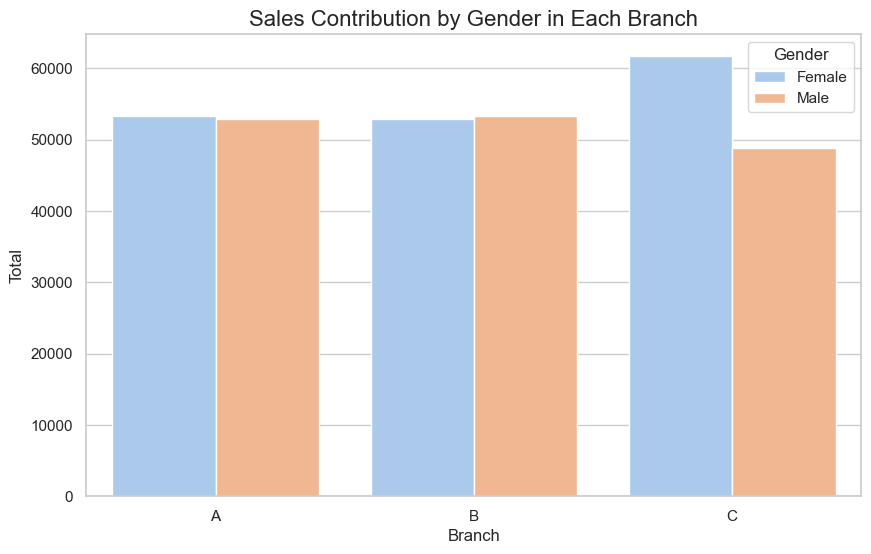

In [20]:
# Group by Branch and Gender, and calculate total sales
branch_gender_sales = df.groupby(['Branch', 'Gender'])['Total'].sum().reset_index()

# Plot sales by gender across branches
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', hue='Gender', data=branch_gender_sales, palette='pastel')
plt.title("Sales Contribution by Gender in Each Branch", fontsize=16)
plt.show()


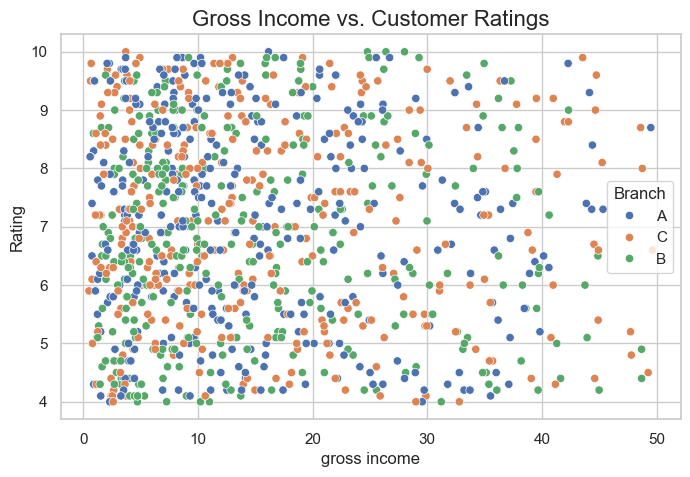

In [21]:
# Scatter plot to analyze relationship between gross income and ratings
plt.figure(figsize=(8, 5))
sns.scatterplot(x='gross income', y='Rating', data=df, hue='Branch', palette='deep')
plt.title("Gross Income vs. Customer Ratings", fontsize=16)
plt.show()
